https://neuraldatascience.io/7-eeg/erp_group_stats.html#a-priori-t-test

In [1]:
# Load packages
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
import os

In [4]:
# Load data

img_directory_training = "/srv/eeg_reconstruction/shared/things_eeg_2/y63gw/osfstorage/training_images"

# Load image and texts
directory = img_directory_training
img_directory = img_directory_training
dirnames = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
dirnames.sort()

texts = []
images = []

for dir in dirnames:
    try:
        idx = dir.index('_')
        description = dir[idx+1:]
    except ValueError:
        print(f"Skipped: {dir} due to no '_' found.")
        continue

    new_description = f"This picture is {description}"
    texts.append(new_description)

all_folders = [d for d in os.listdir(img_directory) if os.path.isdir(os.path.join(img_directory, d))]
all_folders.sort()

for folder in all_folders:
    folder_path = os.path.join(img_directory, folder)
    all_images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    all_images.sort()
    images.extend(os.path.join(folder_path, img) for img in all_images)



In [47]:
EEG_PATH = "/srv/eeg_reconstruction/shared/things_eeg_2/Preprocessed_data_250Hz/"

def getSubEeg(subject = "sub-01", split="test"):
    print("Getting eeg data for", subject)
    fpath = os.path.join(EEG_PATH, subject, f"preprocessed_eeg_{split}.npy")
    data_list = []

    # load EEGs
    data = np.load(fpath, allow_pickle=True)
    preprocessed_eeg_data = data['preprocessed_eeg_data']
    print(preprocessed_eeg_data.shape)

    n_classes = 200
    samples_per_class = 1 # images per class

    for i in range(n_classes):
        start_index = i * samples_per_class
        preprocessed_eeg_data_class = preprocessed_eeg_data[start_index: start_index+samples_per_class]
        data_list.append(preprocessed_eeg_data_class)

    return np.array(data_list)

subjects = os.listdir(EEG_PATH)
eegData = np.array([getSubEeg(sub, "training") for sub in subjects])

Getting eeg data for sub-05
(16540, 4, 63, 250)
Getting eeg data for sub-10
(16540, 4, 63, 250)
Getting eeg data for sub-06
(16540, 4, 63, 250)
Getting eeg data for sub-02
(16540, 4, 63, 250)
Getting eeg data for sub-09
(16540, 4, 63, 250)
Getting eeg data for sub-03
(16540, 4, 63, 250)
Getting eeg data for sub-07
(16540, 4, 63, 250)
Getting eeg data for sub-04
(16540, 4, 63, 250)
Getting eeg data for sub-01
(16540, 4, 63, 250)
Getting eeg data for sub-08
(16540, 4, 63, 250)


In [19]:
chan_order = ['Fp1', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3',
        'F1', 'F2', 'F4', 'F6', 'F8', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 
        'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T7', 'C5', 'C3', 'C1',
        'Cz', 'C2', 'C4', 'C6', 'T8', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 
        'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P7', 'P5', 'P3', 'P1',
        'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8',
        'O1', 'Oz', 'O2']

# P1 ERP component, should have positive polarity
time_win = (.080, .140)
electrodes = ('O1', 'O2', 'PO7', 'PO8', 'Pz', 'P3', 'P4')
roi = [chan_order.index(e) for e in electrodes]

In [44]:
eegData.shape
# participants, classes, images, repetitions, channels, time steps

(10, 1654, 1, 4, 63, 250)

In [ ]:
eegData

## Inter-subject t test

In [52]:
# Return the diff of mean of responses to two different image conditions
def getSubAvgDiff(eeg, trials, image1Index, image2Index):
    epochs_data1 = eeg[image1Index][0] # first image in first class
    evoked_data1 = np.mean(epochs_data1[:trials], axis=0) # average across trials

    epochs_data2 = eeg[image2Index][0]# first image in second class
    evoked_data2 = np.mean(epochs_data2[:trials], axis=0)

    diff_waves = evoked_data1 - evoked_data2
    return diff_waves


In [58]:
# randomly sample 1000 image pairs

import random

numClasses = len(eegData[0])
image_pairs = []

while len(image_pairs) < 1000:
    pair = random.sample(range(numClasses), 2)
    image_pairs.append(pair)

print(image_pairs)

[[1025, 1336], [208, 820], [8, 225], [819, 442], [1440, 926], [1149, 660], [199, 898], [50, 428], [639, 1008], [412, 1587], [1417, 322], [912, 1474], [1239, 502], [574, 274], [52, 0], [759, 1391], [638, 84], [1010, 699], [1381, 164], [1097, 916], [1515, 754], [1525, 67], [25, 1112], [1, 191], [830, 949], [722, 261], [1214, 473], [181, 1145], [310, 78], [206, 1239], [1625, 511], [1232, 9], [1413, 823], [1107, 845], [1390, 543], [1022, 398], [772, 620], [1199, 374], [1499, 1608], [1027, 1241], [1519, 563], [911, 1350], [987, 709], [1411, 755], [326, 1549], [546, 304], [1631, 1489], [1587, 1396], [189, 645], [853, 770], [1248, 21], [931, 1100], [1125, 1615], [481, 598], [1183, 543], [99, 255], [1117, 771], [824, 284], [1440, 864], [775, 317], [197, 654], [55, 1495], [428, 280], [1548, 290], [29, 732], [714, 612], [162, 701], [848, 1244], [1071, 1621], [1322, 737], [1281, 791], [1585, 670], [1199, 1201], [724, 953], [1374, 519], [1364, 1310], [382, 129], [993, 966], [1491, 1591], [1163, 14

In [61]:
subjectCount = len(eegData)

tvals = []
pvals = []

for pair in image_pairs:
    differences = np.array([getSubAvgDiff(eegData[i], 4, pair[0], pair[1]) for i in range(subjectCount)])
    #print(differences.shape) #(10, 63, 250)
    y = differences[:, roi, int(time_win[0]*250) : int(time_win[1]*250)]
    y = np.mean(y, axis=2)
    #print(y.shape) #(10, 7)
    t, pval = stats.ttest_1samp(y, 0)

    tvals.append(round(t[0], 2))
    pvals.append(round(pval[0], 4))


In [62]:
print(pvals)

[0.5941, 0.1091, 0.426, 0.0423, 0.2249, 0.4235, 0.8527, 0.0207, 0.3737, 0.7228, 0.0927, 0.969, 0.2555, 0.1329, 0.5469, 0.7477, 0.1903, 0.2983, 0.1929, 0.0955, 0.0099, 0.9725, 0.0027, 0.7772, 0.0832, 0.0045, 0.0198, 0.0343, 0.3226, 0.0149, 0.9461, 0.3924, 0.0466, 0.0313, 0.8041, 0.225, 0.0395, 0.1833, 0.1585, 0.2058, 0.9282, 0.0403, 0.1539, 0.7863, 0.3451, 0.2829, 0.3358, 0.5455, 0.5267, 0.8969, 0.6823, 0.8847, 0.9167, 0.2741, 0.6238, 0.0924, 0.1983, 0.9972, 0.3769, 0.0734, 0.0034, 0.0526, 0.0644, 0.0013, 0.0974, 0.7041, 0.4034, 0.1793, 0.0414, 0.1298, 0.039, 0.6612, 0.1336, 0.0265, 0.4194, 0.6341, 0.2949, 0.1454, 0.8693, 0.0117, 0.0149, 0.0634, 0.0159, 0.048, 0.9252, 0.7758, 0.4236, 0.9651, 0.4833, 0.0753, 0.0646, 0.9123, 0.0612, 0.8452, 0.0585, 0.1534, 0.002, 0.2704, 0.5833, 0.898, 0.9183, 0.0273, 0.1788, 0.3997, 0.33, 0.3556, 0.228, 0.4493, 0.6341, 0.9111, 0.4173, 0.6272, 0.3973, 0.0182, 0.0457, 0.8868, 0.8056, 0.7063, 0.8597, 0.9808, 0.8563, 0.343, 0.1783, 0.1785, 0.1687, 0.1588, 0.

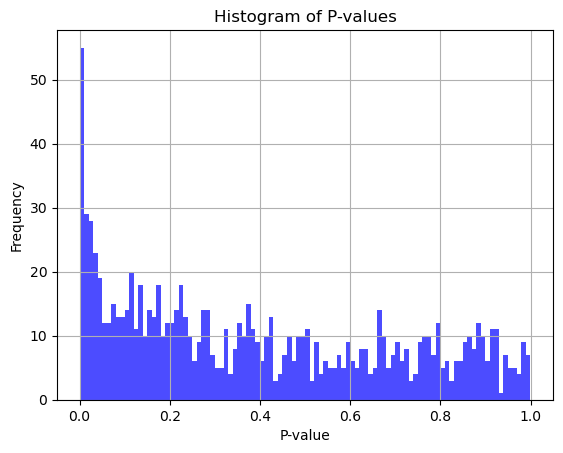

In [64]:
plt.hist(pvals, bins=100, color='blue', alpha=0.7)
plt.title('Histogram of P-values')
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [43]:
subjectCount = len(eegData)


repeats = list(range(4, 81, 4))
print(repeats)
tvals = []
pvals = []

for repetitions in repeats:
    differences = np.array([getSubAvgDiff(eegData[i], repetitions) for i in range(subjectCount)])
    print(differences.shape) #(10, 63, 250)
    y = differences[:, roi, int(time_win[0]*250) : int(time_win[1]*250)]
    print(y.shape) #(10, 7, 15)
    y = np.mean(y, axis=2)
    print(y.shape) #(10, 7)
    t, pval = stats.ttest_1samp(y, 0)
    print(pval)

    tvals.append(round(t[0], 2))
    pvals.append(round(pval[0], 4))

[4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80]
trials: 4
(4, 63, 250)
(4, 63, 250)
trials: 4
(4, 63, 250)
(4, 63, 250)
trials: 4
(4, 63, 250)
(4, 63, 250)
trials: 4
(4, 63, 250)
(4, 63, 250)
trials: 4
(4, 63, 250)
(4, 63, 250)
trials: 4
(4, 63, 250)
(4, 63, 250)
trials: 4
(4, 63, 250)
(4, 63, 250)
trials: 4
(4, 63, 250)
(4, 63, 250)
trials: 4
(4, 63, 250)
(4, 63, 250)
trials: 4
(4, 63, 250)
(4, 63, 250)
(10, 63, 250)
(10, 7, 15)
(10, 7)
[0.00944339 0.57050935 0.26371692 0.56053742 0.30349656 0.30960602
 0.37543205]
trials: 8
(4, 63, 250)
(4, 63, 250)
trials: 8
(4, 63, 250)
(4, 63, 250)
trials: 8
(4, 63, 250)
(4, 63, 250)
trials: 8
(4, 63, 250)
(4, 63, 250)
trials: 8
(4, 63, 250)
(4, 63, 250)
trials: 8
(4, 63, 250)
(4, 63, 250)
trials: 8
(4, 63, 250)
(4, 63, 250)
trials: 8
(4, 63, 250)
(4, 63, 250)
trials: 8
(4, 63, 250)
(4, 63, 250)
trials: 8
(4, 63, 250)
(4, 63, 250)
(10, 63, 250)
(10, 7, 15)
(10, 7)
[0.00944339 0.57050935 0.26371692 0.56053742 0.303496

In [ ]:
# randomly sample N pairs of images

In [32]:
pvals

[0.0094,
 0.0094,
 0.0094,
 0.0094,
 0.0094,
 0.0094,
 0.0094,
 0.0094,
 0.0094,
 0.0094,
 0.0094,
 0.0094,
 0.0094,
 0.0094,
 0.0094,
 0.0094,
 0.0094,
 0.0094,
 0.0094,
 0.0094]

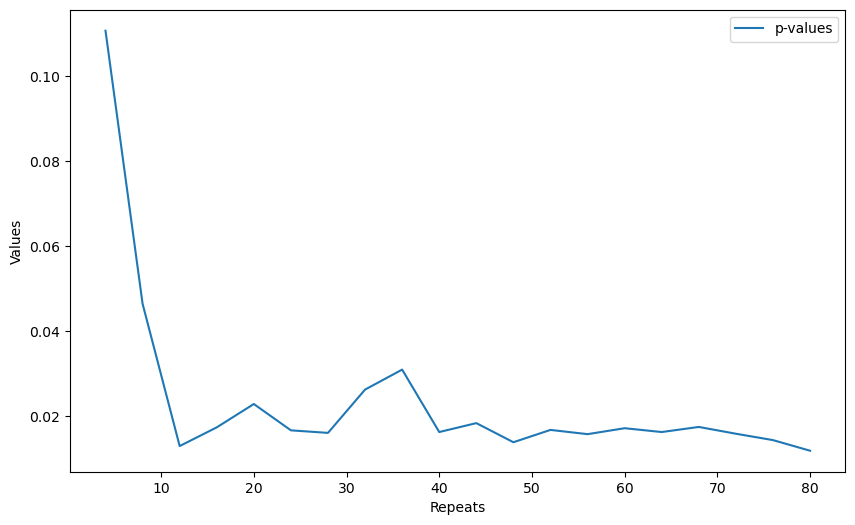

In [9]:
plt.figure(figsize=(10,6))
# plt.plot(repeats, tvals, label="t-values")
plt.plot(repeats, pvals, label="p-values")

plt.xlabel("Repeats")
plt.ylabel("Values")
plt.legend()

plt.show()

## Within-subject t test

In [73]:
# Return the diff of mean of responses to two different image conditions
def getSubDiff(eeg, trials = 80):
    epochs_data1 = eeg[132][0][:trials] # first image in first class
    epochs_data2 = eeg[151][0][:trials]# first image in second class

    diff_waves = epochs_data1 - epochs_data2
    return diff_waves

In [74]:
subject = 1

repeats = list(range(4, 81, 4))
tvals = []
pvals = []

for repetitions in repeats:
    differences = getSubDiff(eegData[subject], repetitions)
    # print(differences.shape) #(repetitions, 63, 250)
    y = differences[:, roi, int(time_win[0]*250) : int(time_win[1]*250)]
    #print(y.shape) #(repetitions, 7, 15)
    y = np.mean(y, axis=2)
    #print(y.shape) #(repetitions, 7)
    t, pval = stats.ttest_1samp(y, 0)

    tvals.append(round(t[0], 2))
    pvals.append(round(pval[0], 4))

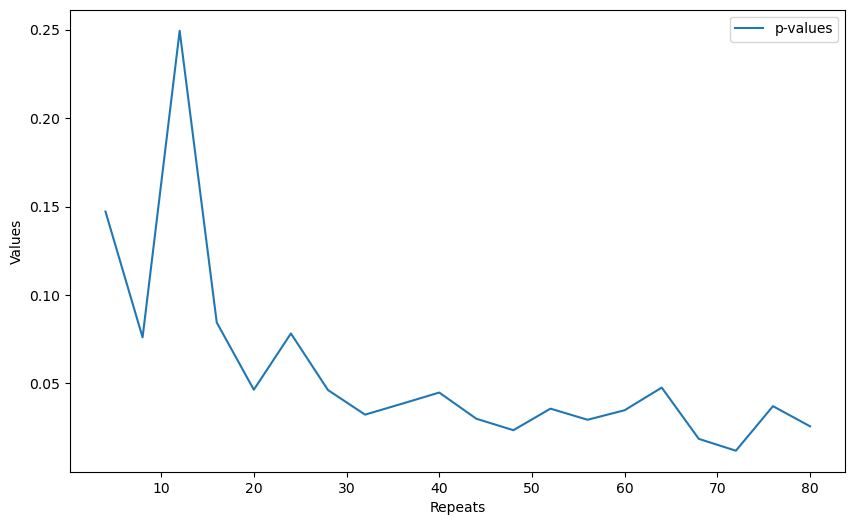

In [75]:
plt.figure(figsize=(10,6))
# plt.plot(repeats, tvals, label="t-values")
plt.plot(repeats, pvals, label="p-values")

plt.xlabel("Repeats")
plt.ylabel("Values")
plt.legend()

plt.show()

In [62]:
for i, repetitions in enumerate(repeats):
    print("p value for " + str(repetitions) + " repetitions: " + str(pvals[i]))

p value for 4 repetitions: 0.6692
p value for 8 repetitions: 0.3888
p value for 12 repetitions: 0.2848
p value for 16 repetitions: 0.3237
p value for 20 repetitions: 0.226
p value for 24 repetitions: 0.0598
p value for 28 repetitions: 0.0475
p value for 32 repetitions: 0.016
p value for 36 repetitions: 0.0132
p value for 40 repetitions: 0.018
p value for 44 repetitions: 0.0194
p value for 48 repetitions: 0.0069
p value for 52 repetitions: 0.0046
p value for 56 repetitions: 0.0034
p value for 60 repetitions: 0.0024
p value for 64 repetitions: 0.0046
p value for 68 repetitions: 0.0023
p value for 72 repetitions: 0.0007
p value for 76 repetitions: 0.0003
p value for 80 repetitions: 0.0002


## Sanity check on train dataset

In [42]:
sub1TrainEeg = getSubEeg("sub-01", "training")

Getting eeg data for sub-01


In [43]:
sub1TrainEeg.shape

(200, 1, 4, 63, 250)

In [63]:
repeats = list(range(2, 5, 1)) # We need at least 2 samples to compute sample variance for the t test
tvals = []
pvals = []

for repetitions in repeats:
    differences = getSubDiff(sub1TrainEeg, repetitions)
    # print(differences.shape) #(repetitions, 63, 250)
    y = differences[:, roi, int(time_win[0]*250) : int(time_win[1]*250)]
    #print(y.shape) #(repetitions, 7, 15)
    y = np.mean(y, axis=2)
    #print(y.shape) #(repetitions, 7)
    t, pval = stats.ttest_1samp(y, 0)

    tvals.append(round(t[0], 2))
    pvals.append(round(pval[0], 4))

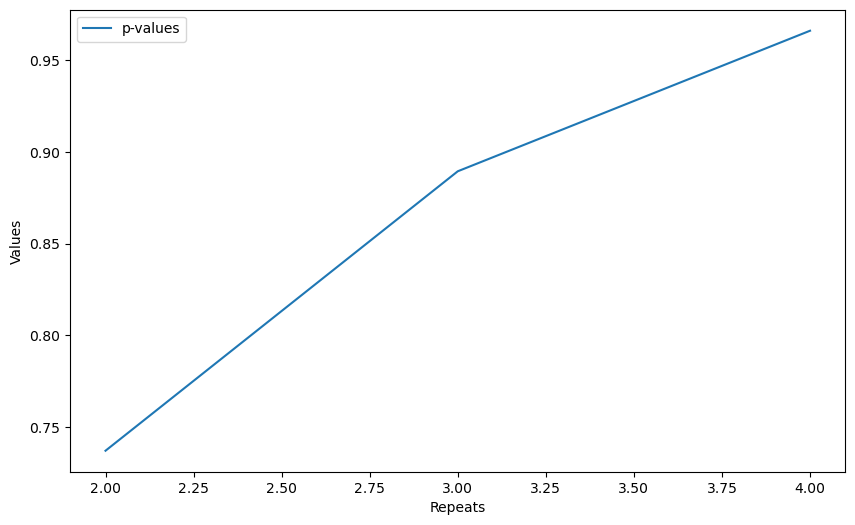

In [66]:
plt.figure(figsize=(10,6))
# plt.plot(repeats, tvals, label="t-values")
plt.plot(repeats, pvals, label="p-values")

plt.xlabel("Repeats")
plt.ylabel("Values")
plt.legend()

plt.show()